In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [2]:
calc=pd.read_csv("/kaggle/input/breast-cancer-data-set/mass.csv")
calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 1696 non-null   object 
 1   breast_density             1696 non-null   int64  
 2   left or right breast       1696 non-null   object 
 3   image view                 1696 non-null   object 
 4   abnormality id             1696 non-null   int64  
 5   abnormality type           1696 non-null   object 
 6   mass shape                 1692 non-null   object 
 7   mass margins               1636 non-null   object 
 8   assessment                 1696 non-null   int64  
 9   pathology                  1696 non-null   object 
 10  subtlety                   1696 non-null   int64  
 11  image file path            1696 non-null   object 
 12  cropped image file path    1696 non-null   object 
 13  ROI mask file path         1696 non-null   objec

In [3]:
calc.isna().sum()

patient_id                    0
breast_density                0
left or right breast          0
image view                    0
abnormality id                0
abnormality type              0
mass shape                    4
mass margins                 60
assessment                    0
pathology                     0
subtlety                      0
image file path               0
cropped image file path       0
ROI mask file path            0
StudyInstanceUID              0
image_path                    0
BitsAllocated                 0
BitsStored                    0
BodyPartExamined              0
Columns                       0
ContentDate                   0
ContentTime                   0
ConversionType                0
HighBit                       0
InstanceNumber                0
LargestImagePixelValue        0
Laterality                    0
Modality                      0
PatientID                     0
PatientName                   0
PatientOrientation            0
Photomet

In [4]:
calc_clean=calc.copy()
calc_clean['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True) 
calc_clean['mass margins'].fillna(method = 'bfill', axis = 0, inplace=True)
calc_clean.isna().sum()

patient_id                   0
breast_density               0
left or right breast         0
image view                   0
abnormality id               0
abnormality type             0
mass shape                   0
mass margins                 0
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
StudyInstanceUID             0
image_path                   0
BitsAllocated                0
BitsStored                   0
BodyPartExamined             0
Columns                      0
ContentDate                  0
ContentTime                  0
ConversionType               0
HighBit                      0
InstanceNumber               0
LargestImagePixelValue       0
Laterality                   0
Modality                     0
PatientID                    0
PatientName                  0
PatientOrientation           0
PhotometricInterpretation    0
Rows    

In [5]:
calc_work=calc_clean[["pathology","image_path"]]
calc_work.info()
calc_work.describe()
calc_work.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pathology   1696 non-null   object
 1   image_path  1696 non-null   object
dtypes: object(2)
memory usage: 26.6+ KB


,pathology,image_path
0,MALIGNANT,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.245063...
1,MALIGNANT,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.859522...
2,MALIGNANT,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.221311...
3,MALIGNANT,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.239949...
4,BENIGN,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.215081...


In [6]:
image_dir="/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg"

calc_work1=calc_work.copy()



In [7]:
calc_work1['image_path'] = calc_work1['image_path'].apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))


In [8]:
calc_work1['image_path'].head()

0    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
1    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
2    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
3    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
4    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
Name: image_path, dtype: object

In [9]:
df=calc_work1.drop(index=calc_work1[calc_work1["pathology"]== "BENIGN_WITHOUT_CALLBACK"].index)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555 entries, 0 to 1695
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pathology   1555 non-null   object
 1   image_path  1555 non-null   object
dtypes: object(2)
memory usage: 36.4+ KB


In [10]:
import matplotlib.pyplot as plt
import PIL

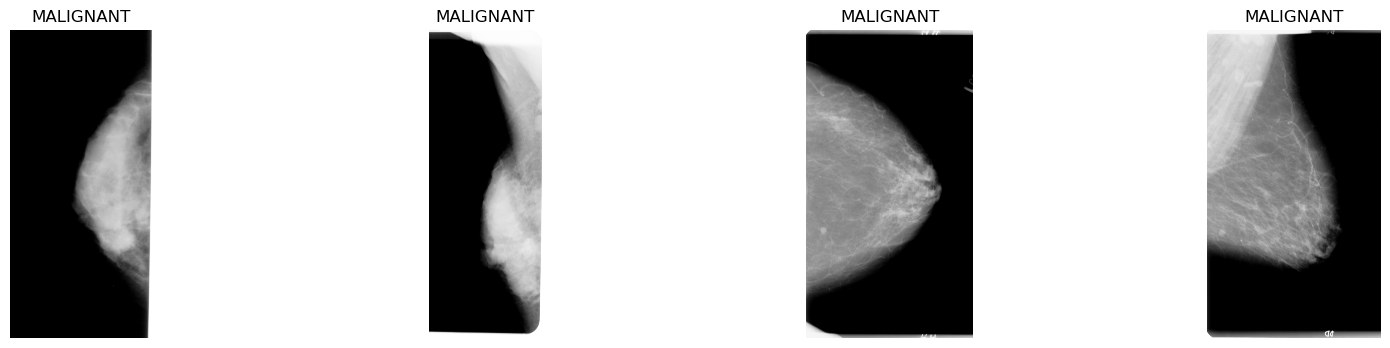

In [11]:
# Create a subplot with 1 row and 4 columns
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# Iterate over the first 4 rows of the DataFrame using the "head" method
for i, row in df.head(4).iterrows():
    # Load the image and convert it to grayscale
    full_mammogram_images_show = PIL.Image.open(row['image_path'])
    gray_img = full_mammogram_images_show.convert("L")
    
    # Show the image in a subplot with its corresponding label
    axs[i].imshow(gray_img, cmap='Greys_r')
    axs[i].axis('off')
    axs[i].set_title(row['pathology'])
    
plt.show()

In [12]:
# Define the batch size and input shape for the CNN model
batch_size = 32
img_shape = (224, 224, 3)

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [14]:
# set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [15]:

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_dataframe(dataframe=df,
                                                    directory="./",
                                                    x_col="image_path",
                                                    y_col="pathology",
                                                    target_size=(128, 128),
                                                    batch_size=32,
                                                    class_mode="binary",
                                                    subset="training",
                                                    shuffle=True,
                                                    seed=42)
valid_generator = train_datagen.flow_from_dataframe(dataframe=df,
                                                    directory="./",
                                                    x_col="image_path",
                                                    y_col="pathology",
                                                    target_size=(128, 128),
                                                    batch_size=32,
                                                    class_mode="binary",
                                                    subset="validation",
                                                    shuffle=True,
                                                    seed=42)


Found 1244 validated image filenames belonging to 2 classes.
Found 311 validated image filenames belonging to 2 classes.


model 1

model 2

In [16]:
# define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# train the model
filepath="saved_models/model-{epoch:02d}-{val_loss:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=10,
                    callbacks=callbacks_list)

# save the final model
model.save("final_model2.h5")

Epoch 1/10
39/39 [==============================] - ETA: 0s - loss: 0.6927 - acc: 0.5161
Epoch 1: val_loss improved from inf to 0.70406, saving model to saved_models/model-01-0.70.h5
39/39 [==============================] - 267s 7s/step - loss: 0.6927 - acc: 0.5161 - val_loss: 0.7041 - val_acc: 0.4630
Epoch 2/10
39/39 [==============================] - ETA: 0s - loss: 0.6880 - acc: 0.5354
Epoch 2: val_loss did not improve from 0.70406
39/39 [==============================] - 212s 5s/step - loss: 0.6880 - acc: 0.5354 - val_loss: 0.7150 - val_acc: 0.4244
Epoch 3/10
39/39 [==============================] - ETA: 0s - loss: 0.6903 - acc: 0.5330
Epoch 3: val_loss did not improve from 0.70406
39/39 [==============================] - 217s 6s/step - loss: 0.6903 - acc: 0.5330 - val_loss: 0.7078 - val_acc: 0.4534
Epoch 4/10
39/39 [==============================] - ETA: 0s - loss: 0.6884 - acc: 0.5474
Epoch 4: val_loss did not improve from 0.70406
39/39 [==============================] - 211s 5s/

model 3

image input


2nd option the show


In [17]:
import tensorflow as tf
from PIL import Image
import io
import ipywidgets as widgets
import nibabel as nib

# Define the input widget
file_upload = widgets.FileUpload(accept='image/*')

# Define the output widget
pathology = widgets.Label()

# Define the predict button
predict_button = widgets.Button(description='Predict')

# Load the pre-trained model
model = tf.keras.models.load_model('final_model2.h5')

# Define the make_prediction function
def make_prediction(img):
    # Convert the image to a NumPy array
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    # Expand the dimensions of the array to match the input shape of the model
    img_array = tf.expand_dims(img_array, axis=0)
    
    # Normalize the pixel values to be between 0 and 1
    img_array = img_array / 255.0
    
    # Make the prediction using the model
    prediction = model.predict(img_array)
    
    # Return the predicted class
    return 'malignant' if prediction[0][0] > 0.5 else 'benign'

# Define the predict_image function
def predict_image(button):
    # Get the uploaded file
    uploaded_image = file_upload.value
    
    # Read the uploaded file as an image
    img = Image.open(io.BytesIO(uploaded_image[0]['content']))
    
    # Convert the grayscale image to an RGB image
    img = img.convert('RGB')
    
    # Resize the image to 128x128
    img = img.resize((128, 128))
    
    # Make the prediction using the resized image
    prediction = make_prediction(img)
    
    # Update the pathology label with the prediction
    pathology.value = f"Prediction: {prediction}"
    
# Attach the predict_image function to the predict button
predict_button.on_click(predict_image)

# Display the input widget and the label
display(file_upload)
display(predict_button)
display(pathology)


FileUpload(value={}, accept='image/*', description='Upload')

Button(description='Predict', style=ButtonStyle())

Label(value='')

alternative